<a href="https://colab.research.google.com/github/asafdari-boop/ComputationalPhyiscsLibrary/blob/main/Derivative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculate the first-order derivative using different methods

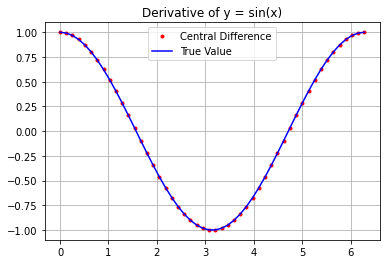

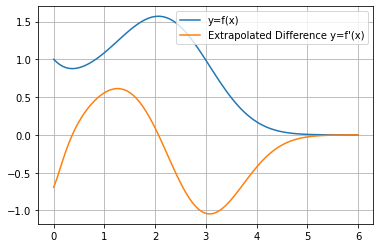

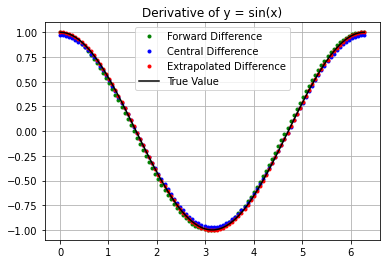

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# calculate the first-order derivative
def calc_derivative(f, x, method='central', h=0.01):
    if method == 'central':
        return (f(x+h) - f(x-h))/(2*h)
    elif method == 'forward':
        return (f(x+h)-f(x))/h
    elif method == 'backward':
        return (f(x)-f(x-h))/h
    elif method == 'extrapolated':
        return ((f(x-h/2)-8*f(x-h/4)+8*f(x+h/4)-f(x+h/2))/(3*h))
    else:
        raise ValueError("Method must be 'central', 'forward', 'backward' or 'extrapolated'")

## check for sin(x)
plt.figure(1)

x = np.linspace(0, 2*np.pi, 50)
dydx = calc_derivative(np.sin, x, method='central')
dYdx = np.cos(x)  # precise formula

plt.plot(x,dydx,'r.',label='Central Difference')
plt.plot(x,dYdx,'b',label='True Value')

plt.title('Derivative of y = sin(x)')
plt.legend(loc='best')
plt.grid(True)

# check for a more complicated formula
plt.figure(2)
x = np.linspace(0,6,100)
f = lambda x: ((4*x**2 + 2*x + 1)/(x + 2*np.exp(x)))**x
y = f(x)
dydx = calc_derivative(f, x, method='extrapolated')

plt.plot(x,y,label='y=f(x)')
plt.plot(x,dydx,label="Extrapolated Difference y=f'(x)")
plt.legend(loc='best')
plt.grid(True)

# compare between forward and central differences
## check for sin(x)
plt.figure(3)

x = np.linspace(0, 2*np.pi, 100)
dYdx = np.cos(x)  # precise formula
dydx_forward = calc_derivative(np.sin, x, method='forward', h=0.1)
dydx_central = calc_derivative(np.sin, x, method='central', h=0.4)
dydx_extrapolated = calc_derivative(np.sin, x, method='extrapolated', h=0.4)

plt.plot(x, dydx_forward,'g.',label='Forward Difference')
plt.plot(x, dydx_central,'b.',label='Central Difference')
plt.plot(x, dydx_extrapolated,'r.',label='Extrapolated Difference')
plt.plot(x, dYdx,'k',label='True Value')

plt.title('Derivative of y = sin(x)')
plt.legend(loc='best')
plt.grid(True)

plt.show()

# Calculate high-order derivatives for f(x) = 3*e^x /(x^2 + x +1) using scipy


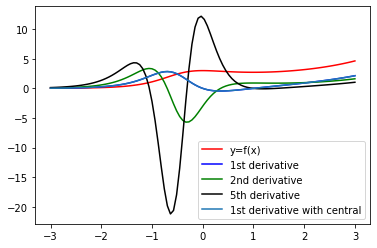

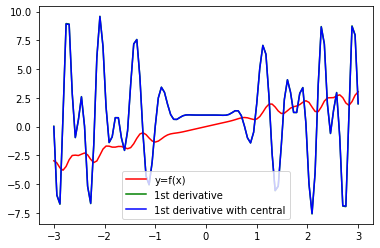

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

def f(x):
  return 3*np.exp(x) / (x**2 + x + 1)

x = np.linspace(-3, 3, 100)
y = f(x)

a1 = derivative(f, x, dx=0.001, n=1)
a2 = derivative(f, x, dx=0.001, n=2) 
a5 = derivative(f, x, dx=0.001, n=3, order=5) 
dydx = calc_derivative(f, x, method='central')  # my own derivative function

plt.figure(1)
plt.plot(x, y, color='r', label='y=f(x)')
plt.plot(x, a1, color='b', label='1st derivative')
plt.plot(x, a2, color='g', label='2nd derivative')
plt.plot(x, a5, color='k', label='5th derivative')
plt.plot(x, dydx, label='1st derivative with central')  # overlap with the 1st derivative curve from scipy
plt.legend()

##################################
plt.figure(2)
def g(x):
  return (np.sin(x**2)**2) * (np.tanh(x)**2) * np.cos(10*x) + x

y = g(x)

a1 = derivative(g, x, dx=0.001, n=1)
dydx2 = calc_derivative(g, x, method='central')
plt.plot(x, y, color='r', label='y=g(x)')
plt.plot(x, a1, color='g', label='1st derivative')
plt.plot(x, dydx2, color='b', label='1st derivative with central')  
plt.legend()
plt.show()

# Calculate high-oder derivatives for a sample y(x) where x and y are both arrays

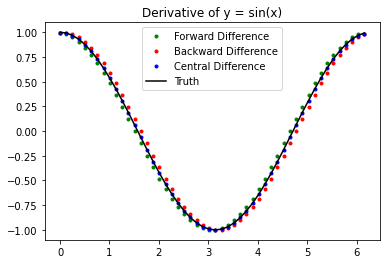

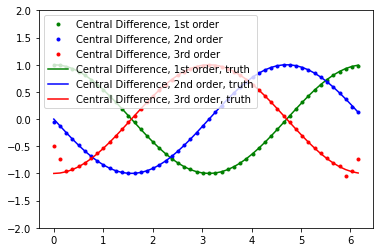

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# both x and y are numpy arrays
def derivative_forward(x, y, h):
    n = len(x)
    dydx=[]
    for i in range(n):
        if i==(n-1):
            dydx.append((y[n-1]-y[n-2])/h)
        else:
            dydx.append((y[i+1]-y[i])/h)
    return dydx

def derivative_backward(x, y, h):
    n = len(x)
    dydx=[]
    for i in range(n):
        if i==0:
            dydx.append((y[1]-y[0])/h)
        else:
            dydx.append((y[i]-y[i-1])/h)
    return dydx

def derivative_central(x, y, h):
    n = len(x)
    dydx=[]
    for i in range(n):
        if i==0:
            dydx.append((y[1]-y[0])/h)
        elif i==(n-1):
            dydx.append((y[n-1]-y[n-2])/h)
        else:
            dydx.append((y[i+1]-y[i-1])/(2*h))
    return dydx

# main derivative function
def derivative(x, y, h, method='central'):
    if method == 'central':
        return derivative_central(x, y, h)
    elif method == 'forward':
        return derivative_forward(x, y, h)
    elif method == 'backward':
        return derivative_backward(x, y, h)
    else:
        raise ValueError("Method must be 'central', 'forward', 'backward'")

# calculate higher-order derivatives for a given order n
def derivative_order(x, y, h, n, method='central'):
    dydx = derivative(x, y, h, method)
    if n==1:
        return dydx
    elif n>1:
        orders = n
        dydx_copy = dydx.copy()
        while orders > 1:
            dydx_copy = derivative(x, dydx_copy, h, method)
            orders -= 1
        return dydx_copy
    else:
        raise ValueError("n needs to be >=1")

## check for sin(x)
a = 0.
b = 2*np.pi
n = 50
h = (b-a)/n

# define data sample points
x = np.arange(a, b, h)
y = np.sin(x)
dydx_forward = derivative_forward(x, y, h)
dydx_backward = derivative_backward(x, y, h)
dydx_central = derivative_central(x, y, h)
dYdx = np.cos(x)  # precise formula

# compare the results from different derivative methods
plt.figure(1)
plt.plot(x, dydx_forward, 'g.',label='Forward Difference')
plt.plot(x, dydx_backward, 'r.',label='Backward Difference')
plt.plot(x, dydx_central, 'b.',label='Central Difference')
plt.plot(x, dYdx, 'k',label='Truth')
plt.title('Derivative of y = sin(x)')
plt.legend(loc='best')

# compare results for higher-order derivatives
plt.figure(2)
dydx_central_1st = derivative_order(x, y, h, 1)
dydx_central_2nd = derivative_order(x, y, h, 2)
dydx_central_3rd = derivative_order(x, y, h, 3)
plt.plot(x, dydx_central_1st, 'g.',label='Central Difference, 1st order')
plt.plot(x, dydx_central_2nd, 'b.',label='Central Difference, 2nd order')
plt.plot(x, dydx_central_3rd, 'r.',label='Central Difference, 3rd order')
plt.plot(x, np.cos(x), 'g',label='Central Difference, 1st order, truth')
plt.plot(x, -np.sin(x), 'b',label='Central Difference, 2nd order, truth')
plt.plot(x, -np.cos(x), 'r',label='Central Difference, 3rd order, truth')
plt.ylim(-2, 2)
plt.legend(loc='best')
plt.show()